# Project Name: Bank Customer Churn Prediction using H2O Auto ML

 
### 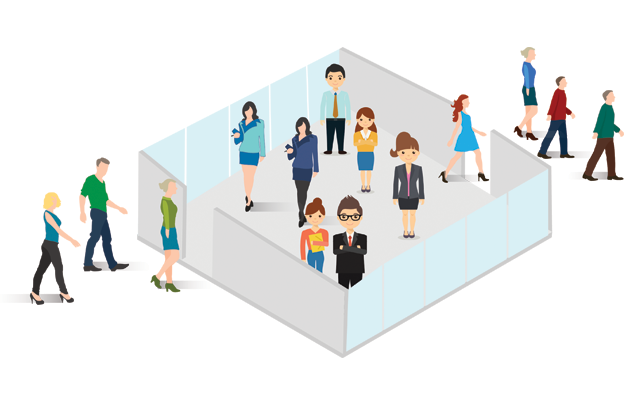

## Context: 
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplish the following for this study:

- Identify and visualize which factors contribute to customer churn.

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

## Aim:
### We aim to accomplish the following for this study:

- Identify and visualize which factors contribute to customer churn.

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

## Time Line of the Project:
- Data Analysis
- Feature Engineering
- Model Building using ANN 
- Model Building and Prediction using H2O Auto ML

In [2]:
import os
os.getcwd() 

'C:\\Users\\adity'

In [3]:
os.chdir("E:\\minor_project")

In [4]:
os.getcwd()

'E:\\minor_project'

In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv('Churn_Modelling.csv')

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Analysis

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

## EDA

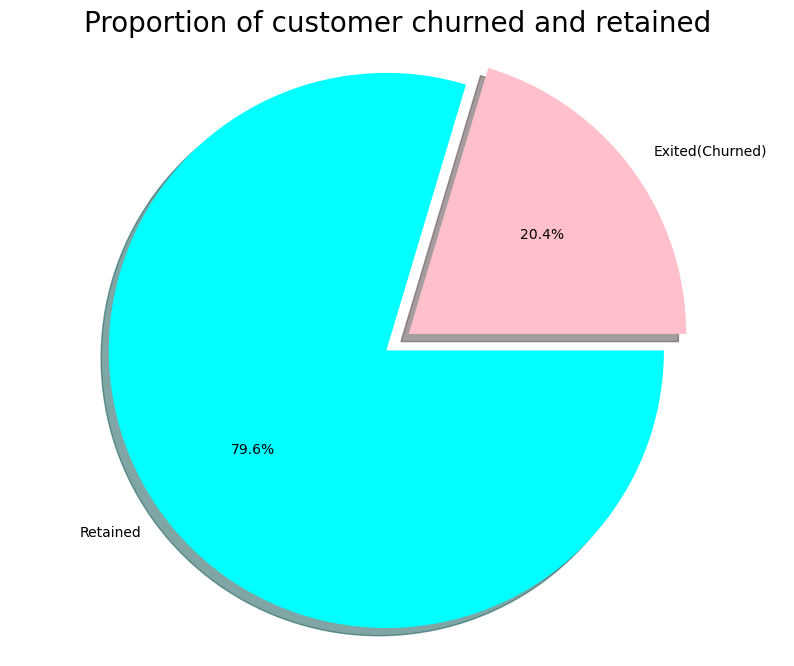

In [13]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode,colors={"cyan","pink"}, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=360)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [14]:
import seaborn as sns

### Reviewing the 'Status' relation with categorical variables

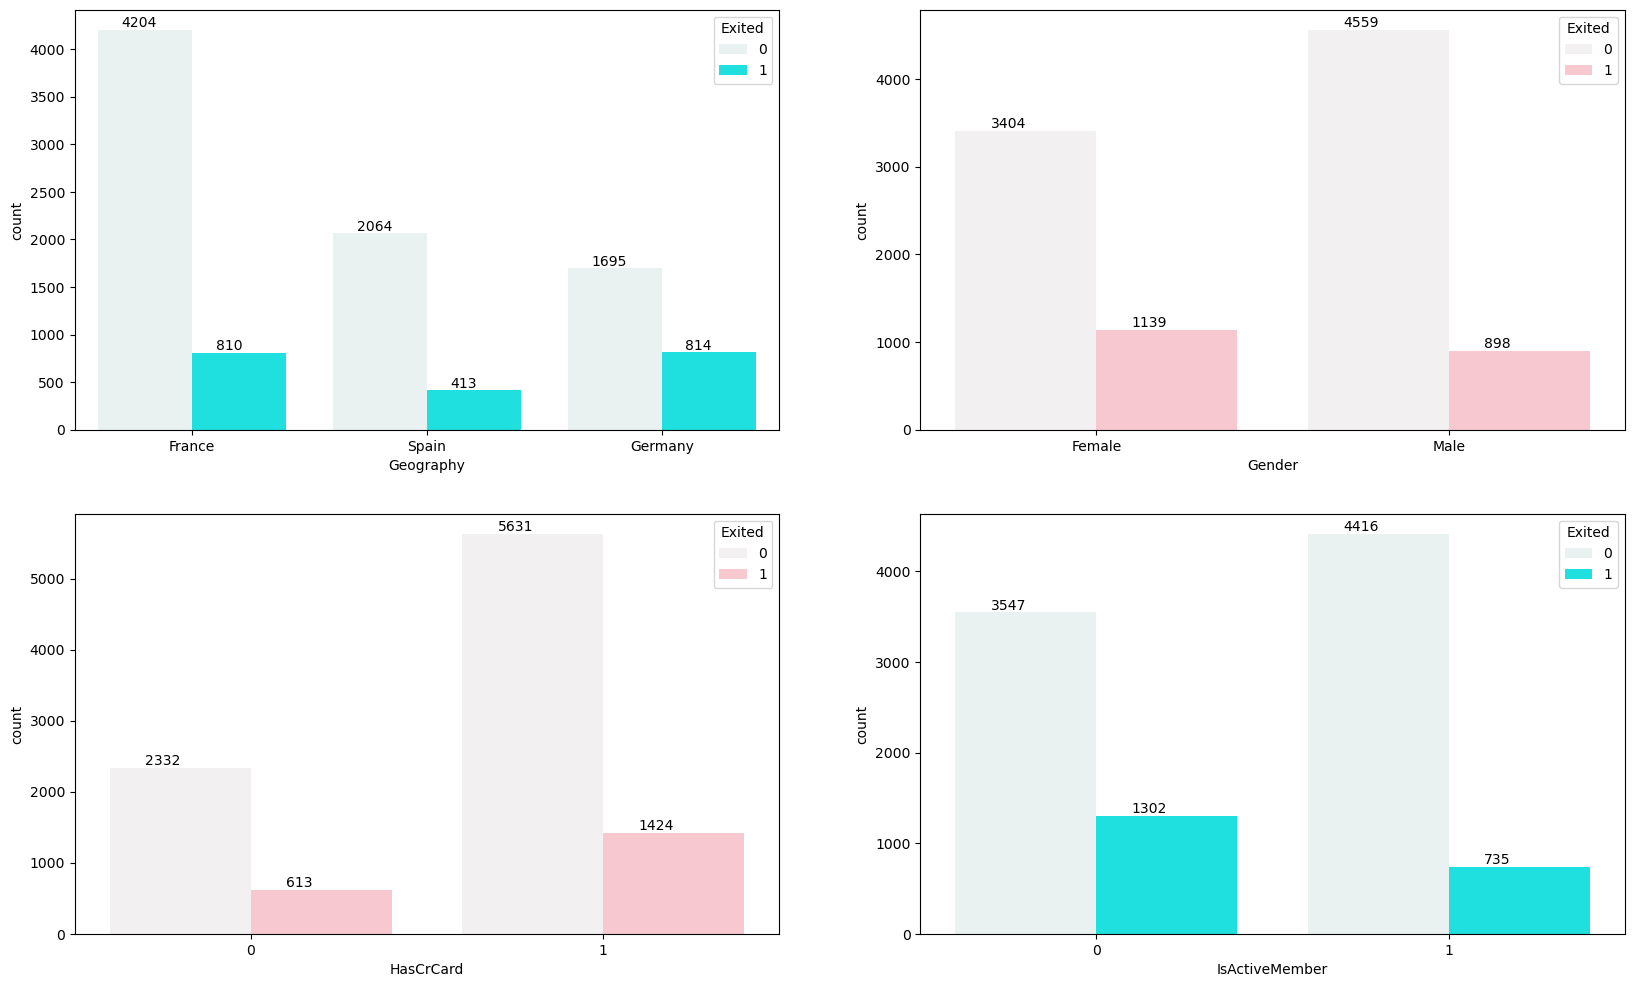

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

# Plot for 'Geography'
sns.countplot(x='Geography', hue='Exited', color="cyan", data=df, ax=axarr[0][0])
for p in axarr[0][0].patches:
    axarr[0][0].annotate(f'{int(p.get_height())}', (p.get_x()+0.1, p.get_height()), ha='left', va='bottom')

# Plot for 'Gender'
sns.countplot(x='Gender', hue='Exited', color="pink", data=df, ax=axarr[0][1])
for p in axarr[0][1].patches:
    axarr[0][1].annotate(f'{int(p.get_height())}', (p.get_x()+0.1, p.get_height()), ha='left', va='bottom')

# Plot for 'HasCrCard'
sns.countplot(x='HasCrCard', hue='Exited', color="pink", data=df, ax=axarr[1][0])
for p in axarr[1][0].patches:
    axarr[1][0].annotate(f'{int(p.get_height())}', (p.get_x()+0.1, p.get_height()), ha='left', va='bottom')

# Plot for 'IsActiveMember'
sns.countplot(x='IsActiveMember', hue='Exited', color="cyan", data=df, ax=axarr[1][1])
for p in axarr[1][1].patches:
    axarr[1][1].annotate(f'{int(p.get_height())}', (p.get_x()+0.1, p.get_height()), ha='left', va='bottom')

plt.show()


<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

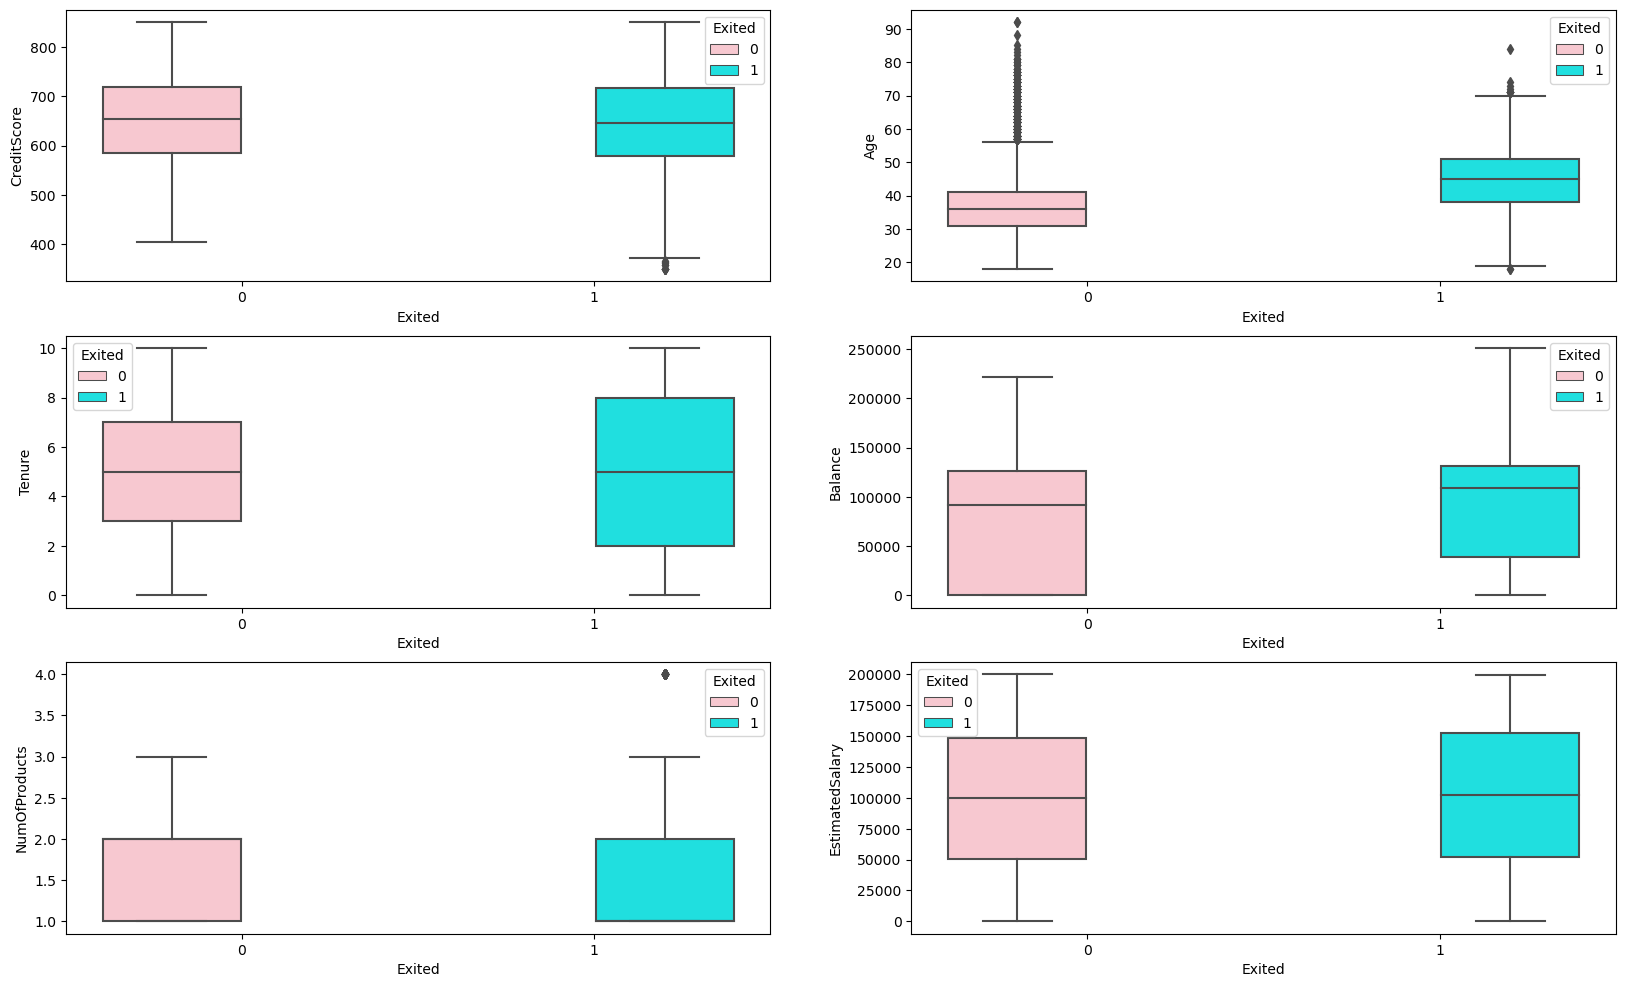

In [15]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
colors=["pink", "cyan"]
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0], palette=colors)
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1], palette=colors)
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0], palette=colors)
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1], palette=colors)
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0], palette=colors)
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1], palette=colors)

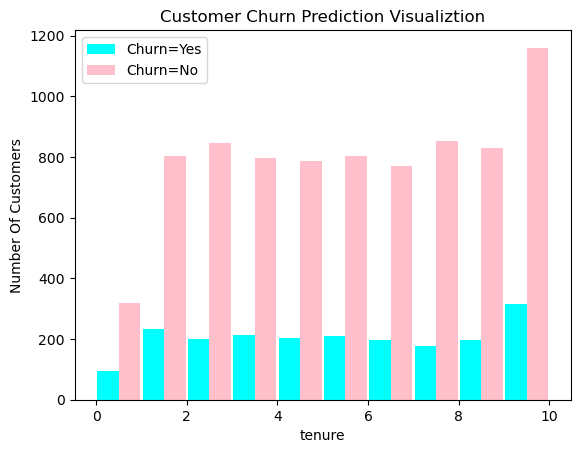

In [16]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['cyan','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

## Feature Engineering

### Making a new column BalanceSalaryRatio

(-1.0, 5.0)

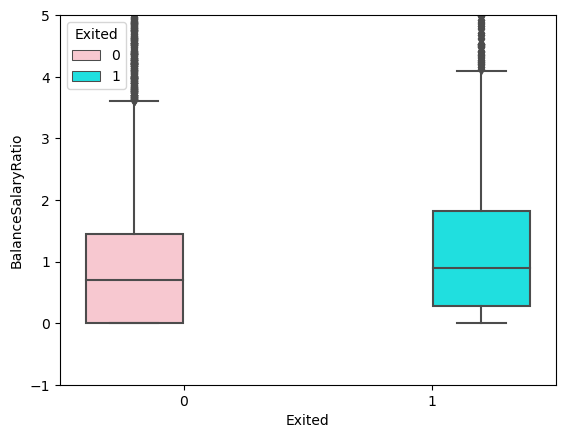

In [18]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
colors=["pink", "cyan"]
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df, palette=colors)
plt.ylim(-1, 5)


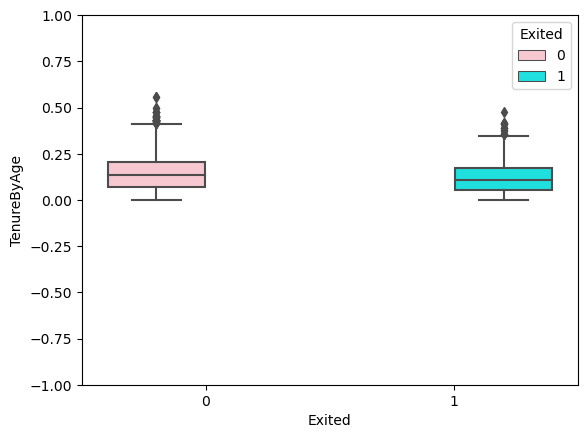

In [18]:
df['TenureByAge'] = df.Tenure/(df.Age)
colors=["pink", "cyan"]
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df, palette=colors)
plt.ylim(-1, 1)
plt.show()

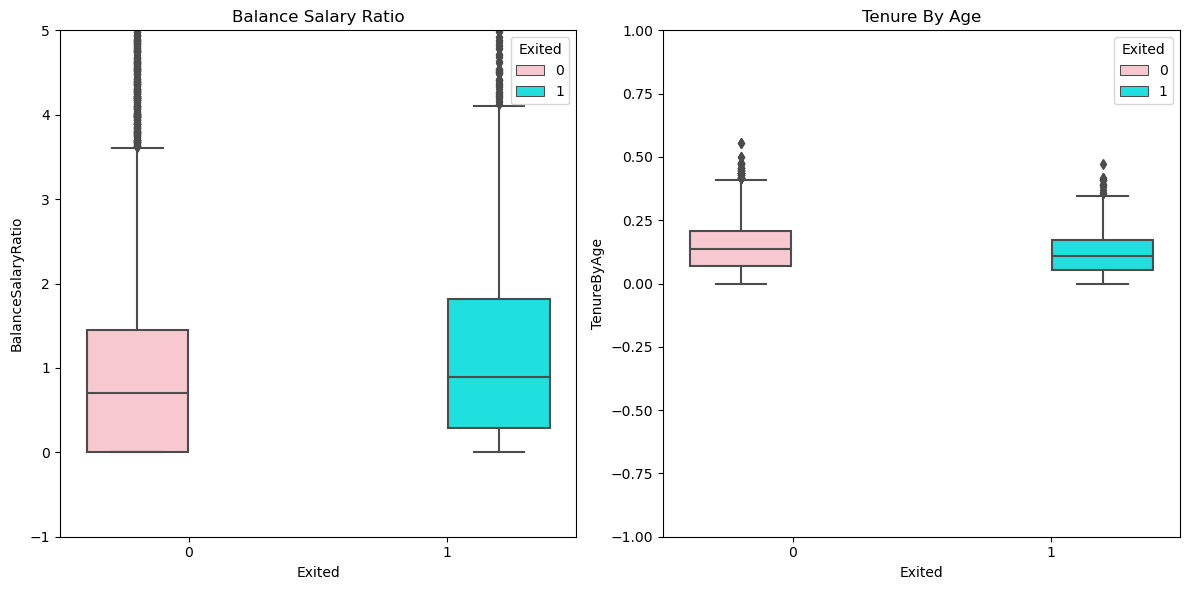

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for 'BalanceSalaryRatio'
df['BalanceSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
sns.boxplot(y='BalanceSalaryRatio', x='Exited', hue='Exited', data=df, palette=colors, ax=axes[0])
axes[0].set_ylim(-1, 5)
axes[0].set_title('Balance Salary Ratio')

# Plot for 'TenureByAge'
df['TenureByAge'] = df['Tenure'] / df['Age']
sns.boxplot(y='TenureByAge', x='Exited', hue='Exited', data=df, palette=colors, ax=axes[1])
axes[1].set_ylim(-1, 1)
axes[1].set_title('Tenure By Age')

# Display the plots
plt.tight_layout()
plt.show()



#### Printing the categorical variables

In [19]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [20]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

In [21]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding method

In [22]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,False,False,True


### Scaling

In [23]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [24]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,True,False,False
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,False,False,True
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,True,False,False
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,True,False,False
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,False,False,True


In [25]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']                      ##dependent 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=69)

In [26]:
from collections import Counter
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

counter = Counter(y_train)
print('count',counter)

X_train shape: (7500, 14)
y_train shape: (7500,)
count Counter({0: 5998, 1: 1502})


## Model Building and Prediction

## The Sequential model

### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

## A Sequential model is not appropriate when:

-Your model has multiple inputs or multiple outputs
-Any of your layers has multiple inputs or multiple outputs
-You need to do layer sharing
-You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [27]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before', counter)

# oversampling the train dataset using SMOTE
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)


Before Counter({0: 5998, 1: 1502})
After Counter({0: 5998, 1: 5998})


In [28]:
print("X_train_sm data type:", X_train_sm.dtype)
print("y_train_sm data type:", y_train_sm.dtype)


X_train_sm data type: float64
y_train_sm data type: int64


In [29]:
X_train_sm = X_train_sm.astype('float32')
y_train_sm = y_train_sm.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
print("X_train data type:", X_train_sm.dtype)
print("y_train data type:", y_train_sm.dtype)

X_train data type: float32
y_train data type: float32


In [53]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn.metrics import confusion_matrix , classification_report
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train_sm, y_train_sm)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)


C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.844

In [54]:
report = classification_report(y_test, pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90      1965
         1.0       0.64      0.61      0.63       535

    accuracy                           0.84      2500
   macro avg       0.77      0.76      0.76      2500
weighted avg       0.84      0.84      0.84      2500



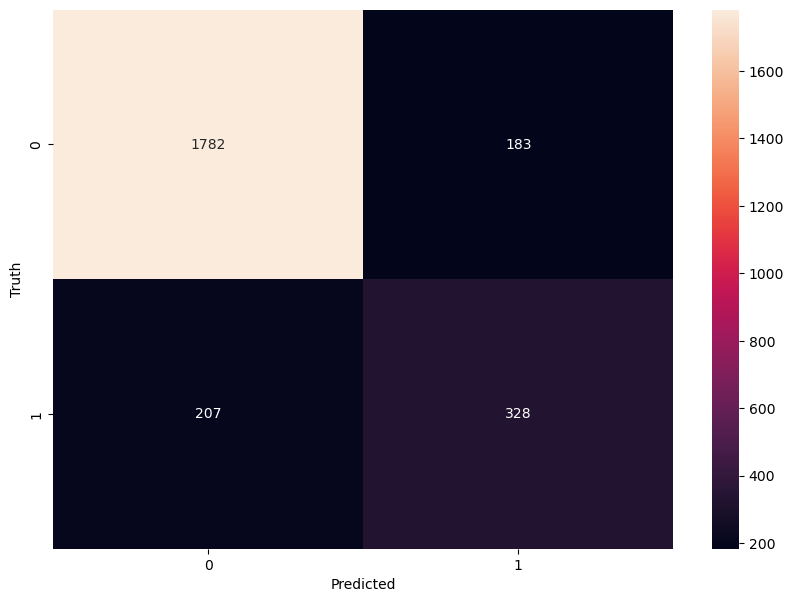

In [55]:
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [56]:
#XGBoost
from xgboost import XGBClassifier, plot_importance
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train_sm, y_train_sm)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.848

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.91      1965
         1.0       0.67      0.58      0.62       535

    accuracy                           0.85      2500
   macro avg       0.78      0.75      0.76      2500
weighted avg       0.84      0.85      0.84      2500



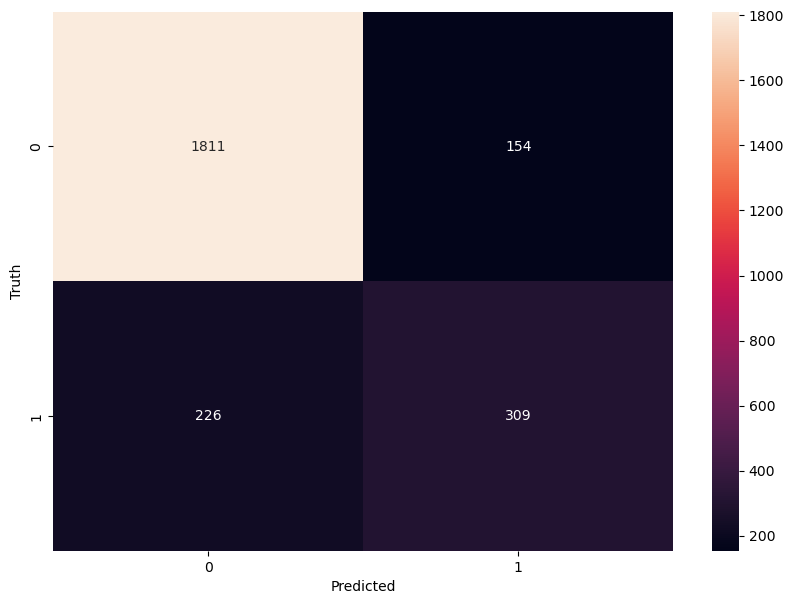

In [57]:
# Generate classification report
report = classification_report(y_test, pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [58]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(14,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_sm, y_train_sm,epochs=100,batch_size=128)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6914 - accuracy: 0.5818
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6373
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6245 - accuracy: 0.6636
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6198 - accuracy: 0.6745
Epoch 5/100
94/94 [==============================] - 0s 3ms/step - loss: 0.6041 - accuracy: 0.6842
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5815 - accuracy: 0.6965
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5699 - accuracy: 0.7037
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5628 - accuracy: 0.7102
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5776 - accuracy: 0.7129
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5530 - accuracy: 0.7205
Epoch 11/

94/94 [==============================] - 0s 3ms/step - loss: 0.4494 - accuracy: 0.7963
Epoch 84/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.7971
Epoch 85/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4718 - accuracy: 0.7999
Epoch 86/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4273 - accuracy: 0.8039
Epoch 87/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4229 - accuracy: 0.8029
Epoch 88/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4213 - accuracy: 0.8029
Epoch 89/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8034
Epoch 90/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4196 - accuracy: 0.8042
Epoch 91/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4214 - accuracy: 0.8045
Epoch 92/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4765 - accuracy: 0.7984
Epoch 93/100


In [60]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7468


[0.5176355838775635, 0.7468000054359436]

In [61]:
yp = model.predict(X_test)
yp

79/79 [==============================] - 0s 2ms/step


array([[0.88751686],
       [0.3196166 ],
       [0.91582704],
       ...,
       [0.33406854],
       [0.19648355],
       [0.11960246]], dtype=float32)

### Converting our predictions to 0,1 to check accuracy

In [62]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [63]:
y_pred  

[1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,


### Checking the accuracy 

In [64]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.73      0.82      1965
         1.0       0.45      0.79      0.57       535

    accuracy                           0.75      2500
   macro avg       0.69      0.76      0.70      2500
weighted avg       0.83      0.75      0.77      2500



Text(95.72222222222221, 0.5, 'Truth')

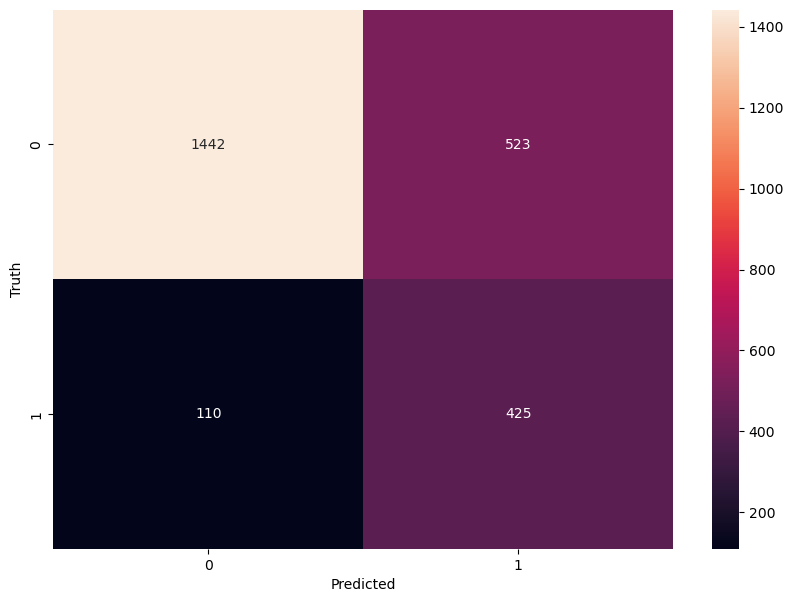

In [65]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
from sklearn.metrics import accuracy_score


In [67]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  74.68 %


In [70]:
# create a svm Classifier
from sklearn import svm
from sklearn import metrics
svc = svm.SVC(kernel='linear') # linear kernel

# train the model using train dataset
svc.fit(X_train_sm, y_train_sm)

# predict the churn for test dataset
y_pred = svc.predict(X_test)
svc_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Train:", metrics.accuracy_score(y_train, svc.predict(X_train)))
print("Accuracy Test:", svc_acc)

C:\Users\adity\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


Accuracy Train: 0.7178666666666667
Accuracy Test: 0.716


Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.72      0.80      1965
         1.0       0.41      0.70      0.51       535

    accuracy                           0.72      2500
   macro avg       0.65      0.71      0.66      2500
weighted avg       0.79      0.72      0.74      2500



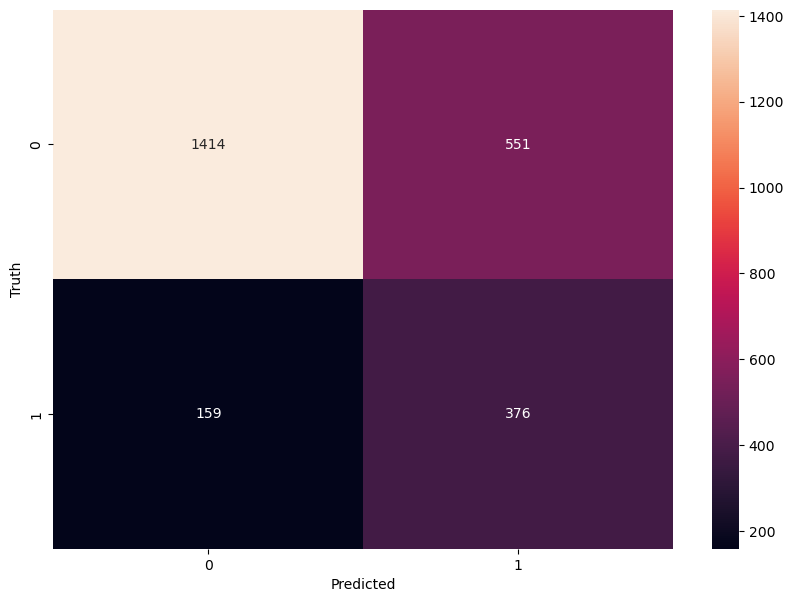

In [74]:

report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()